# Hodgkin-Huxley Model

The [Hodgkin-Huxley model](https://en.wikipedia.org/wiki/Hodgkin–Huxley_model) was developed by [Alan Hodgkin](https://en.wikipedia.org/wiki/Alan_Hodgkin) and [Andrew Huxley](https://en.wikipedia.org/wiki/Andrew_Huxley) in 1952 [[1]](#References). The model tried to replicate the ionic dynamics that produce an action potential and its propagation in the axon of a giant squid. This work led to Hodgkin and Huxley to be the winners of the 1963 Nobel Prize in Physiology or Medicine.

The Hodgkin-Huxley model seeks to replicate the ion activity, basing on the fact that the membrane cell is an insulator: the cell is predominately negative in comparison with the external medium, which is positive. This is caused by a difference in the concentration of the ions sodium $\text{Na}^+$ and $\text{K}^+$. At the beginning of an action potential, the $\text{Na}^+$ channels in the membrane open, allowing the pass of $\text{Na}^+$ ions –this phase is known as depolarization–. Afterward, the channels of $\text{K}^+$ open, allowing the $\text{K}^+$ to move out from the cell –repolarization–. The dynamics of the cell mem can be modeled as an electric circuit:

<p align="center">
    <img width="300" height="300" src="../images/HodgkinHuxley.png">
</p>



The Hodgkin-Huxley model can be described by a system of four ordinary differential equations (ODEs):

<br>
$$
C\frac{dV}{dt} = g_{Na} m^3 h (V - V_{Na}) + g_{k} n ^4 (V - V_{K}) + g_{L} (V - V_{L}) + I \\
\frac{dm}{dt} = \alpha_{m} (V) (1 - m) - \beta_{m} (V) m \\
\frac{dn}{dt} = \alpha_{n} (V) (1 - n) - \beta_{n} (V) n \\ 
\frac{dh}{dt} = \alpha_{h} (V) (1 - h) - \beta_{h} (V) h
$$
<br>

where $V$ is the voltage across the membrane, and $C$ is its capacitance. For each channel, we have specific parameters, namely $E_{x}$ that represents the reversal potential of the ion and $g_{x}$, which is its conductance. $I_{\text{ext}}$ is the external injected current, independent of the membrane dynamics. $m$ and $h$ are the voltage-dependent activation and blocking dynamics of the $\text{Na}^+$. Similarly for $\text{K}^+$, $n$ represents the activation of this channel. $\alpha_x$ and $\beta_x$ are parameters that have been experimentally fitted, corresponding to:

$$
\alpha_{m} (V) = \frac{0.1 (25 - V)}{e^{(25 - V)/10} - 1} \quad \beta_{m} (V) = 4 e^{-V/18}\\
\alpha_{n} (V) = \frac{0.01 (10 - V)}{e^{(10 - V)/10} - 1} \quad \beta_{n} (V) = 0.125 e^{-V/80} \\
\alpha_{h} (V) = 0.07 e^{-V/20} \quad \beta_{h} (V) = \frac{1}{e^{{30-V}/10} + 1}
$$

In the original paper, parameters were set to be 

In [1]:
# Add temporary path to code
import sys
sys.path.append("../")

# Import the module with the Hodgkin-Huxley model
from neural_models import HodgkinHuxley

# Create the model
model = HodgkinHuxley(C=1)

# Run the model
model.run(X0=[-65, 0, 0, 1], current=1)

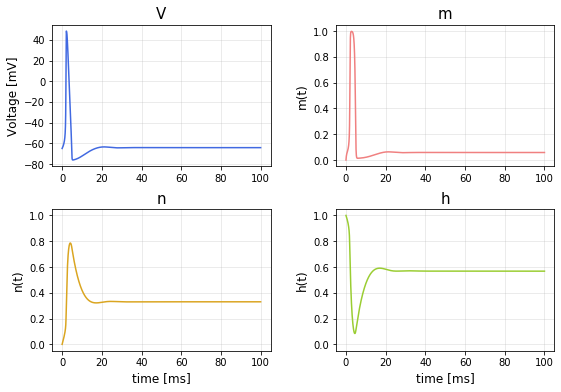

In [2]:
import matplotlib.pyplot as plt

# Plot the results
f, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(9, 6))
f.subplots_adjust(wspace=.3, hspace=.3)

# Plot V(t)
ax1.plot(model.tvec, model.V, color='royalblue')
ax1.set_title("V", fontsize=15)
ax1.set_ylabel("Voltage [mV]", fontsize=12)
ax1.grid(alpha=0.3)

# Plot m(t)
ax2.plot(model.tvec, model.m, color='lightcoral')
ax2.set_title("m", fontsize=15)
ax2.set_ylabel("m(t)", fontsize=12)
ax2.set_ylim([-0.05, 1.05])
ax2.grid(alpha=0.3)

# Plot n(t)
ax3.plot(model.tvec, model.n, color='goldenrod')
ax3.set_title("n", fontsize=15)
ax3.set_xlabel("time [ms]", fontsize=12)
ax3.set_ylabel("n(t)", fontsize=12)
ax3.set_ylim([-0.05, 1.05])
ax3.grid(alpha=0.3)

# Plot h(t)
ax4.plot(model.tvec, model.h, color='yellowgreen')
ax4.set_title("h", fontsize=15)
ax4.set_xlabel("time [ms]", fontsize=12)
ax4.set_ylabel("h(t)", fontsize=12)
ax4.set_ylim([-0.05, 1.05])
ax4.grid(alpha=0.3)
plt.show()

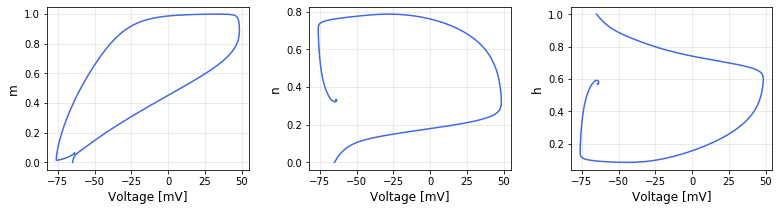

In [3]:
# Plot the phase plane
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 3))
f.subplots_adjust(wspace=.3)

# Plot m over Voltage
ax1.plot(model.V, model.m, color='royalblue')
ax1.set_xlabel("Voltage [mV]", fontsize=12)
ax1.set_ylabel("m", fontsize=12)
ax1.grid(alpha=0.3)

# Plot n over Voltage
ax2.plot(model.V, model.n, color='royalblue')
ax2.set_xlabel("Voltage [mV]", fontsize=12)
ax2.set_ylabel("n", fontsize=12)
ax2.grid(alpha=0.3)

# Plot h over Voltage
ax3.plot(model.V, model.h, color='royalblue')
ax3.set_xlabel("Voltage [mV]", fontsize=12)
ax3.set_ylabel("h", fontsize=12)
ax3.grid(alpha=0.3)
plt.show()

The external current was low enough to prevent the system from reaching a limit cycle. However, we can observe a single spike. By changing the current, we can make the system to move from equilibrium (no firing) to limit cycle (train of spikes):

<p align="left">
    <img width="500" height="500" src="../images/HodgkinHuxley.gif">
</p>

We can rerun the model changing the current to observe the train of spikes:

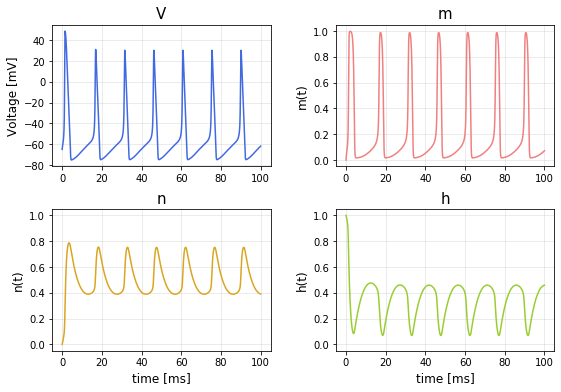

In [4]:
# Run the model
model.run(X0=[-65, 0, 0, 1], current=10)

# Plot the results
f, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(9, 6))
f.subplots_adjust(wspace=.3, hspace=.3)

# Plot V(t)
ax1.plot(model.tvec, model.V, color='royalblue')
ax1.set_title("V", fontsize=15)
ax1.set_ylabel("Voltage [mV]", fontsize=12)
ax1.grid(alpha=0.3)

# Plot m(t)
ax2.plot(model.tvec, model.m, color='lightcoral')
ax2.set_title("m", fontsize=15)
ax2.set_ylabel("m(t)", fontsize=12)
ax2.set_ylim([-0.05, 1.05])
ax2.grid(alpha=0.3)

# Plot n(t)
ax3.plot(model.tvec, model.n, color='goldenrod')
ax3.set_title("n", fontsize=15)
ax3.set_xlabel("time [ms]", fontsize=12)
ax3.set_ylabel("n(t)", fontsize=12)
ax3.set_ylim([-0.05, 1.05])
ax3.grid(alpha=0.3)

# Plot h(t)
ax4.plot(model.tvec, model.h, color='yellowgreen')
ax4.set_title("h", fontsize=15)
ax4.set_xlabel("time [ms]", fontsize=12)
ax4.set_ylabel("h(t)", fontsize=12)
ax4.set_ylim([-0.05, 1.05])
ax4.grid(alpha=0.3)
plt.show()

Now the limit cycle is reached:

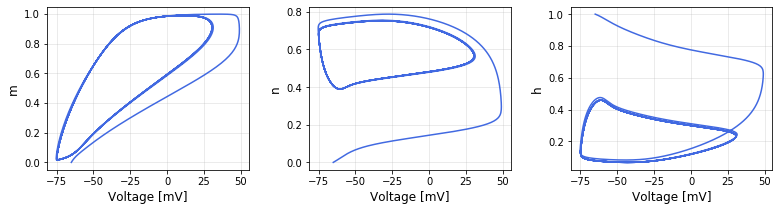

In [5]:
# Plot the phase plane
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 3))
f.subplots_adjust(wspace=.3)

# Plot m over Voltage
ax1.plot(model.V, model.m, color='royalblue')
ax1.set_xlabel("Voltage [mV]", fontsize=12)
ax1.set_ylabel("m", fontsize=12)
ax1.grid(alpha=0.3)

# Plot n over Voltage
ax2.plot(model.V, model.n, color='royalblue')
ax2.set_xlabel("Voltage [mV]", fontsize=12)
ax2.set_ylabel("n", fontsize=12)
ax2.grid(alpha=0.3)

# Plot h over Voltage
ax3.plot(model.V, model.h, color='royalblue')
ax3.set_xlabel("Voltage [mV]", fontsize=12)
ax3.set_ylabel("h", fontsize=12)
ax3.grid(alpha=0.3)
plt.show()

# References

1. [A quantitative description of membrane current and its application to conduction and excitation in nerve](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1392413)